In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [18]:
mapstat_df = pd.read_csv("tournamentdata/old/Map Statistics.csv")
mapstat_df.head()

,Map,Total,Round 1,Round 2,Round 3,Playoffs
0,Ascent,6,1,0,1,4
1,Bind,7,2,1,1,3
2,Breeze,6,1,2,1,2
3,Icebox,7,2,2,1,2
4,Lotus,8,2,2,1,3


In [19]:
mapban_df = pd.read_csv("tournamentdata/old/Maps Banned.csv")
mapban_df.head()

,Map,Total,Round 1,Round 2,Round 3,Playoffs
0,-,2,0,0,0,2
1,Ascent,10,3,4,1,2
2,Bind,9,2,3,1,3
3,Breeze,10,3,2,1,4
4,Icebox,9,2,2,1,4


In [20]:
mapcent_df = pd.read_csv("tournamentdata/old/Side Statistics.csv")
mapcent_df.head()

,Map,Atk Wins Count,Atk Wins Percentage,Def Wins Count,Def Wins Percentage
0,Ascent,54,50.0,54,50.0
1,Bind,47,49.5,48,50.5
2,Breeze,56,55.4,45,44.6
3,Icebox,68,54.0,58,46.0
4,Lotus,98,54.7,81,45.3


In [21]:
merge_df = pd.merge(mapstat_df, mapban_df, on='Map')
merge_df

,Map,Total_x,Round 1_x,Round 2_x,Round 3_x,Playoffs_x,Total_y,Round 1_y,Round 2_y,Round 3_y,Playoffs_y
0,Ascent,6,1,0,1,4,10,3,4,1,2
1,Bind,7,2,1,1,3,9,2,3,1,3
2,Breeze,6,1,2,1,2,10,3,2,1,4
3,Icebox,7,2,2,1,2,9,2,2,1,4
4,Lotus,8,2,2,1,3,8,2,2,1,3
5,Split,9,1,3,0,5,7,3,1,2,1
6,Sunset,9,3,2,1,3,7,1,2,1,3


In [22]:
merge_df = pd.merge(merge_df, mapcent_df, on='Map')
merge_df

,Map,Total_x,Round 1_x,Round 2_x,Round 3_x,Playoffs_x,Total_y,Round 1_y,Round 2_y,Round 3_y,Playoffs_y,Atk Wins Count,Atk Wins Percentage,Def Wins Count,Def Wins Percentage
0,Ascent,6,1,0,1,4,10,3,4,1,2,54,50.0,54,50.0
1,Bind,7,2,1,1,3,9,2,3,1,3,47,49.5,48,50.5
2,Breeze,6,1,2,1,2,10,3,2,1,4,56,55.4,45,44.6
3,Icebox,7,2,2,1,2,9,2,2,1,4,68,54.0,58,46.0
4,Lotus,8,2,2,1,3,8,2,2,1,3,98,54.7,81,45.3
5,Split,9,1,3,0,5,7,3,1,2,1,80,44.9,98,55.1
6,Sunset,9,3,2,1,3,7,1,2,1,3,82,51.6,77,48.4


In [23]:
merge_df = merge_df.rename(columns={"Total_x": "Total Played",
                                    "Round 1_x": "Played in Rd 1",
                                    "Round 2_x": "Played in Rd 2",
                                    "Round 3_x": "Played in Rd 3",
                                    "Playoffs_x": "Played in Playoffs",
                                    "Total_y": "Total Banned",
                                    "Round 1_y": "Banned in Rd 1",
                                    "Round 2_y": "Banned in Rd 2",
                                    "Round 3_y": "Banned in Rd 3",
                                    "Playoffs_y": "Banned in Playoffs"})
merge_df

,Map,Total Played,Played in Rd 1,Played in Rd 2,Played in Rd 3,Played in Playoffs,Total Banned,Banned in Rd 1,Banned in Rd 2,Banned in Rd 3,Banned in Playoffs,Atk Wins Count,Atk Wins Percentage,Def Wins Count,Def Wins Percentage
0,Ascent,6,1,0,1,4,10,3,4,1,2,54,50.0,54,50.0
1,Bind,7,2,1,1,3,9,2,3,1,3,47,49.5,48,50.5
2,Breeze,6,1,2,1,2,10,3,2,1,4,56,55.4,45,44.6
3,Icebox,7,2,2,1,2,9,2,2,1,4,68,54.0,58,46.0
4,Lotus,8,2,2,1,3,8,2,2,1,3,98,54.7,81,45.3
5,Split,9,1,3,0,5,7,3,1,2,1,80,44.9,98,55.1
6,Sunset,9,3,2,1,3,7,1,2,1,3,82,51.6,77,48.4


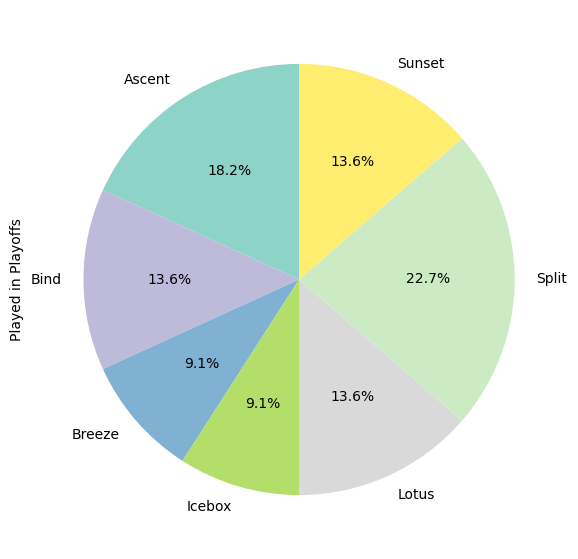

In [24]:
map_count = merge_df.set_index('Map')['Played in Playoffs']

plt.figure(figsize=(7, 7))
map_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.savefig("visuals/MapsPlayoffsOnly.png")

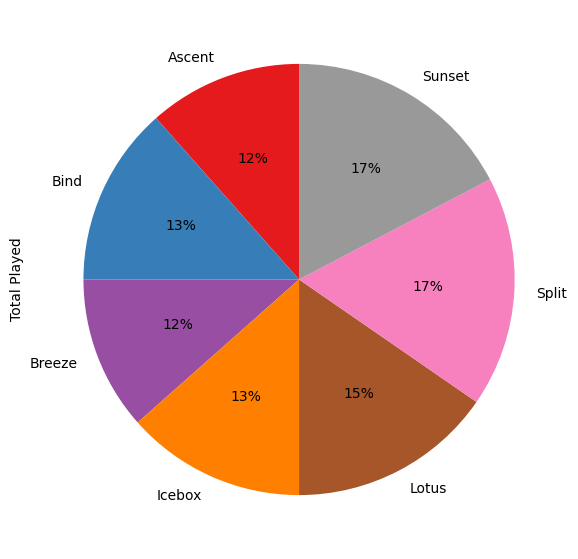

In [25]:
map_count = merge_df.set_index('Map')['Total Played']

plt.figure(figsize=(7, 7))
map_count.plot(kind='pie', autopct='%1.0f%%', startangle=90, cmap='Set1')
plt.savefig("visuals/AllMapsPlayed.png")

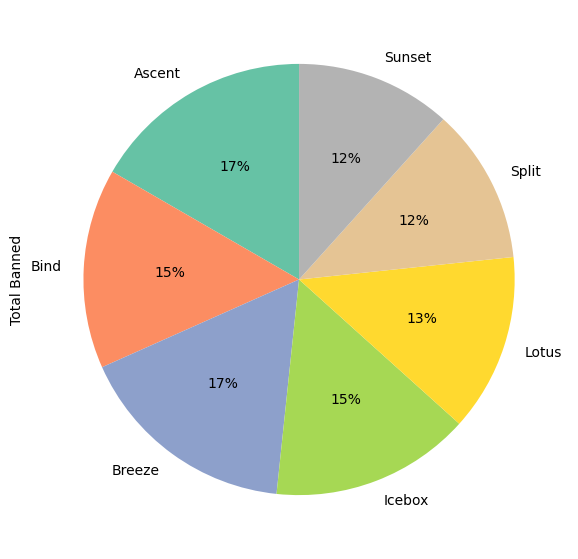

In [26]:
map_count = merge_df.set_index('Map')['Total Banned']

plt.figure(figsize=(7, 7))
map_count.plot(kind='pie', autopct='%1.0f%%', startangle=90, cmap='Set2')
plt.savefig("visuals/MapsBanned.png")

In [27]:
# plt.figure(figsize=(10,6))
# plt.plot(merge_df['Map'], merge_df['Played in Round 1'], marker='o', color='b', linestyle='-', label='Rounds')

# plt.title('Sales Over Time')
#plt.xlabel('Date')
#plt.ylabel('Sales')
#plt.grid(True)
#plt.xticks(rotation=45)

In [28]:
reducedmap_df = merge_df.drop(["Total Played", "Played in Rd 1", "Played in Rd 2", "Played in Rd 3", "Played in Playoffs", "Total Banned", "Banned in Rd 1", "Banned in Rd 2", "Banned in Rd 3", "Banned in Playoffs", "Atk Wins Count", "Def Wins Count"], axis = 1)
print(reducedmap_df)

      Map  Atk Wins Percentage  Def Wins Percentage
0  Ascent                 50.0                 50.0
1    Bind                 49.5                 50.5
2  Breeze                 55.4                 44.6
3  Icebox                 54.0                 46.0
4   Lotus                 54.7                 45.3
5   Split                 44.9                 55.1
6  Sunset                 51.6                 48.4


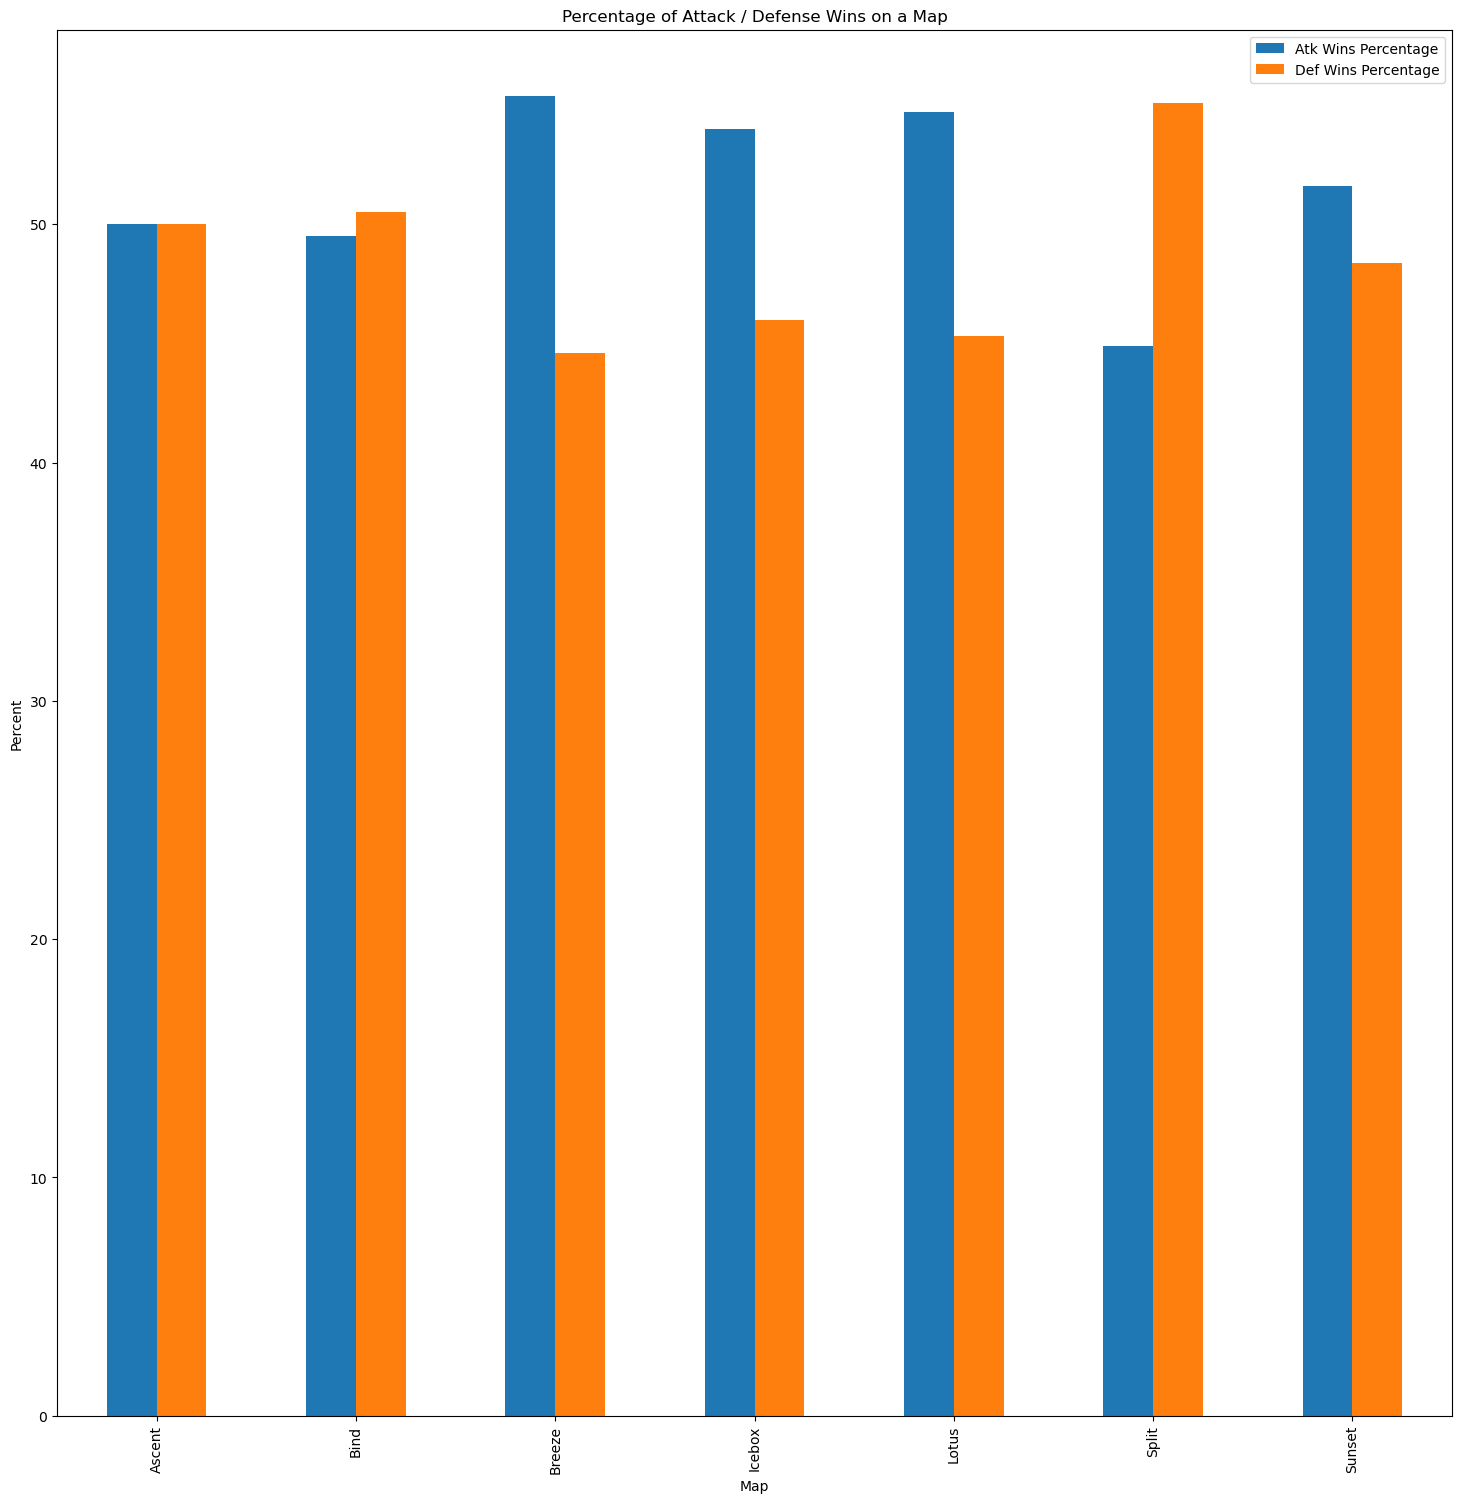

In [29]:
multi_plot = reducedmap_df.plot(kind="bar", figsize=(18,18))

multi_plot.set_xticklabels(reducedmap_df["Map"])

plt.xticks(rotation = 90, fontsize=10)
plt.title("Percentage of Attack / Defense Wins on a Map")
plt.xlabel("Map")
plt.ylabel("Percent")
plt.savefig("visuals/AtkDefWinsonMaps.png")
plt.show()